<a href="https://colab.research.google.com/github/Lahya-Priya/HelloWorld-app-using-streamlit/blob/main/fraud_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2112 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.5301 - loss: 0.7744 - val_accuracy: 0.6648 - val_loss: 0.6073
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.7003 - loss: 0.5842 - val_accuracy: 0.6837 - val_loss: 0.6160
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.7470 - loss: 0.5112 - val_accuracy: 0.7083 - val_loss: 0.5804
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.7869 - loss: 0.4433 - val_accuracy: 0.7519 - val_loss: 0.5975
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.8007 - loss: 0.4294 - val_accuracy: 0.6989 - val_loss: 0.6992
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.8300 - loss: 0.3721 - val_accuracy: 0.7102 - val_loss: 0.6679
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.8836 - loss: 0.2778 - val_accuracy: 0.7595 - val_loss: 0.6511
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.9154 - loss: 0.2077 - val_accuracy: 

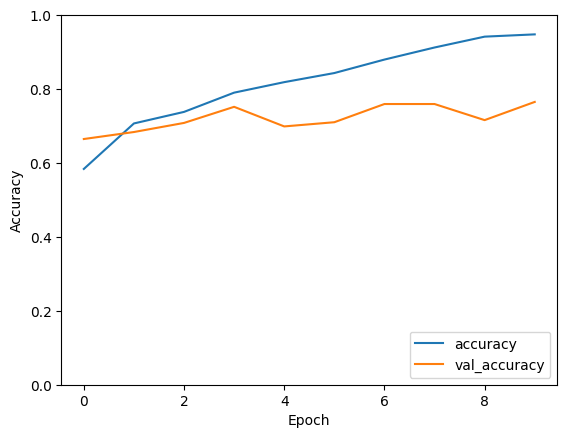

17/17 - 1s - 79ms/step - accuracy: 0.7652 - loss: 0.8308
Test accuracy: 0.7652


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Path to the directory containing multiple ZIP folders
zip_folder_path = "/content/dataset.zip"
extract_path = "/content/signatures"

# Extract all ZIP files in the folder
if not os.path.exists(extract_path):
    os.makedirs(extract_path)
with zipfile.ZipFile(zip_folder_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Update data_dir to point to the extracted folder containing images
data_dir = os.path.join(extract_path, 'signatures') # Assuming 'signatures' folder contains the images
# OR - update if directory name is different:
# data_dir = os.path.join(extract_path, 'your_image_folder_name')

# Create ImageDataGenerators for loading and preprocessing images
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    subset='validation'
)

# ... (rest of the code remains the same)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

Found 2112 images belonging to 2 classes.
Found 528 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 301ms/step - accuracy: 0.6182 - loss: 1.7568 - val_accuracy: 0.8731 - val_loss: 0.3273
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.8644 - loss: 0.3530 - val_accuracy: 0.9034 - val_loss: 0.2478
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 237ms/step - accuracy: 0.9345 - loss: 0.2077 - val_accuracy: 0.9375 - val_loss: 0.1766
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.9707 - loss: 0.1228 - val_accuracy: 0.9223 - val_loss: 0.1825
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.9812 - loss: 0.0890 - val_accuracy: 0.9394 - val_loss: 0.1361
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.9916 - loss: 0.0531 - val_accuracy: 0.9375 - val_loss: 0.1398
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - accuracy: 0.9886 - loss: 0.0568 - val_accuracy: 0.9489 - val_loss: 0.1129
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.9969 - loss: 0.0310 - val_accu

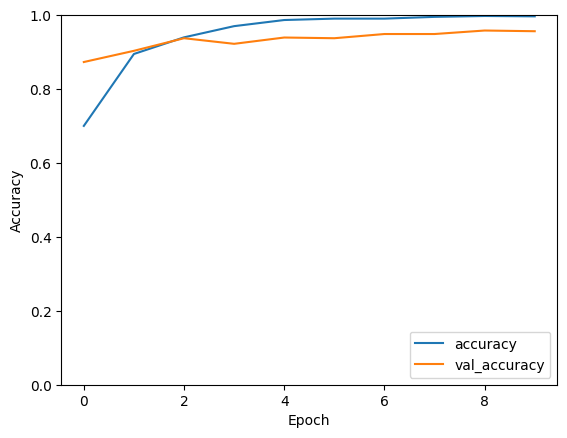

17/17 - 3s - 166ms/step - accuracy: 0.9564 - loss: 0.1148
Test accuracy: 0.9564


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile

# --- Extract ZIP ---
zip_folder_path = "/content/dataset.zip"
extract_path = "/content/signatures"

if not os.path.exists(extract_path):
    os.makedirs(extract_path)
with zipfile.ZipFile(zip_folder_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# --- Set path ---
data_dir = os.path.join(extract_path, 'signatures')  # Update if needed

# --- Image Preprocessing ---
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # VGG16 expects 224x224
    batch_size=32,
    color_mode='rgb',        # VGG16 expects RGB
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    subset='validation'
)

# --- Load VGG16 ---
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False  # Freeze the convolutional base

# --- Build the Model ---
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

# --- Compile the Model ---
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- Train the Model ---
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# --- Plot Training History ---
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# --- Evaluate ---
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


Found 2112 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.5153 - loss: 0.7221 - val_accuracy: 0.6648 - val_loss: 0.6600
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.6560 - loss: 0.6240 - val_accuracy: 0.6402 - val_loss: 0.6206
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.7152 - loss: 0.5579 - val_accuracy: 0.7121 - val_loss: 0.6431
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.7753 - loss: 0.4693 - val_accuracy: 0.7405 - val_loss: 0.5850
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8191 - loss: 0.3891 - val_accuracy: 0.8409 - val_loss: 0.4474
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.8990 - loss: 0.2397 - val_accuracy: 0.6686 - val_loss: 0.8676
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.8566 - loss: 0.3096 - val_accuracy: 0.8523 - val_loss: 0.3914
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.9567 - loss: 0.1224 - val_accuracy: 

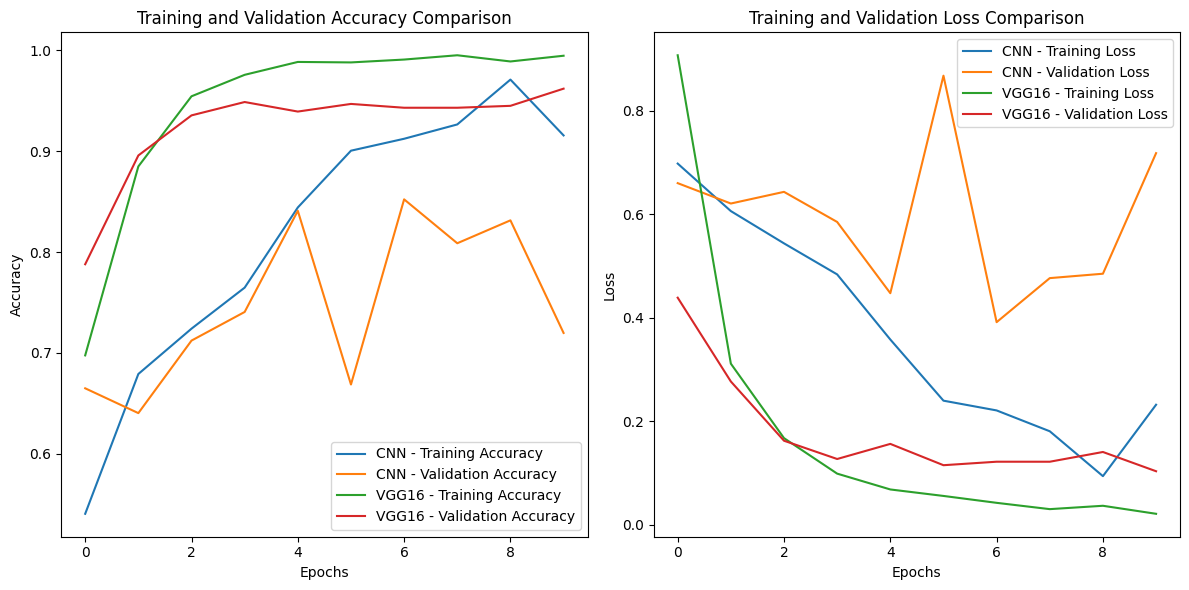

17/17 - 1s - 79ms/step - accuracy: 0.7197 - loss: 0.7179
Model 1 (CNN) Test accuracy: 0.7197
17/17 - 3s - 165ms/step - accuracy: 0.9621 - loss: 0.1034
Model 2 (VGG16) Test accuracy: 0.9621


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Extract ZIP ---
zip_folder_path = "/content/dataset.zip"
extract_path = "/content/signatures"

if not os.path.exists(extract_path):
    os.makedirs(extract_path)
with zipfile.ZipFile(zip_folder_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# --- Set path ---
data_dir = os.path.join(extract_path, 'signatures')  # Update if needed

# --- Image Preprocessing ---
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='binary',
    subset='validation'
)

# --- Model 1: Simple CNN ---
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Train Model 1
history1 = model1.fit(train_generator, epochs=10, validation_data=validation_generator)

# --- Model 2: VGG16 with Fine-Tuning ---
train_datagen_vgg = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator_vgg = train_datagen_vgg.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    subset='training'
)

validation_generator_vgg = train_datagen_vgg.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    subset='validation'
)

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False  # Freeze the convolutional base

model2 = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Train Model 2
history2 = model2.fit(train_generator_vgg, epochs=10, validation_data=validation_generator_vgg)

# --- Plot Training and Validation Accuracy for both models ---
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='CNN - Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='CNN - Validation Accuracy')
plt.plot(history2.history['accuracy'], label='VGG16 - Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='VGG16 - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='CNN - Training Loss')
plt.plot(history1.history['val_loss'], label='CNN - Validation Loss')
plt.plot(history2.history['loss'], label='VGG16 - Training Loss')
plt.plot(history2.history['val_loss'], label='VGG16 - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Comparison')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# --- Evaluate both models ---
test_loss1, test_acc1 = model1.evaluate(validation_generator, verbose=2)
print(f'Model 1 (CNN) Test accuracy: {test_acc1:.4f}')

test_loss2, test_acc2 = model2.evaluate(validation_generator_vgg, verbose=2)
print(f'Model 2 (VGG16) Test accuracy: {test_acc2:.4f}')


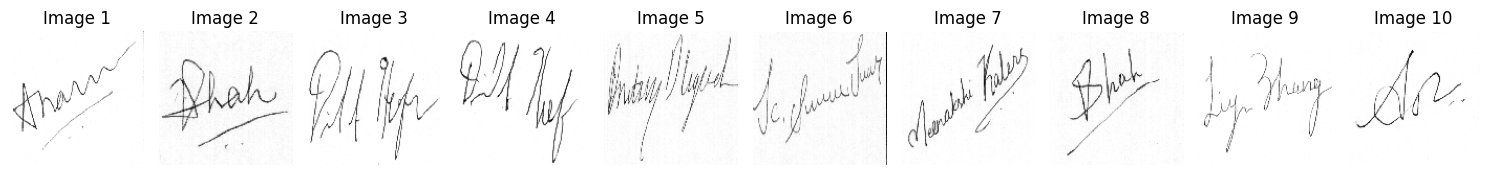

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import os

# Folder path containing the images
img_folder = "/content/signatures/signatures/full_forg"

# List of image filenames (limit to first 5)
image_files = os.listdir(img_folder)[:10]

# Plot the images
plt.figure(figsize=(15, 4))
for i, filename in enumerate(image_files):
    img_path = os.path.join(img_folder, filename)
    img = load_img(img_path, target_size=(128, 128), color_mode='grayscale')
    plt.subplot(1, 10, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


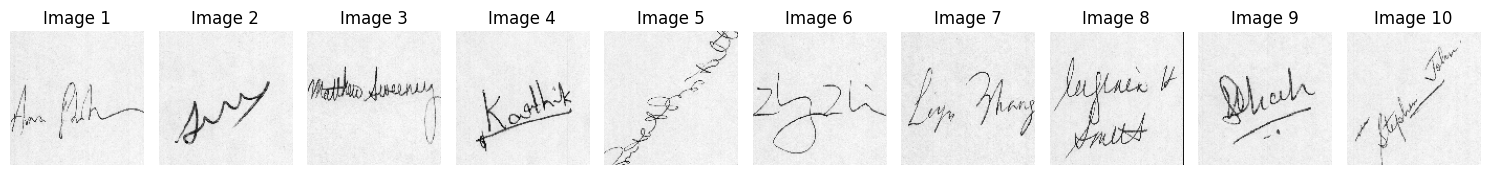

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import os

# Folder path containing the images
img_folder = "/content/signatures/signatures/full_org"

# List of image filenames (limit to first 5)
image_files = os.listdir(img_folder)[:10]

# Plot the images
plt.figure(figsize=(15, 4))
for i, filename in enumerate(image_files):
    img_path = os.path.join(img_folder, filename)
    img = load_img(img_path, target_size=(128, 128), color_mode='grayscale')
    plt.subplot(1, 10, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# --- Paths ---
data_dir = "/content/signatures/signatures"  # Update this if needed

# --- Image Preprocessing ---
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    subset='validation'
)

# --- Load VGG16 Base Model ---
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional base

# --- Add Custom Layers ---
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# --- Compile ---
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- Train ---
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Found 2112 images belonging to 2 classes.
Found 528 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.6383 - loss: 1.0799 - val_accuracy: 0.8939 - val_loss: 0.2625
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.8993 - loss: 0.2526 - val_accuracy: 0.9375 - val_loss: 0.1770
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - accuracy: 0.9737 - loss: 0.1135 - val_accuracy: 0.9394 - val_loss: 0.1372
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.9882 - loss: 0.0688 - val_accuracy: 0.9413 - val_loss: 0.1322
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.9964 - loss: 0.0394 - val_accuracy: 0.9337 - val_loss: 0.1567
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.9964 - loss: 0.0294 - val_accuracy: 0.9432 - val_loss: 0.1481
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - accuracy: 0.9977 - loss: 0.0208 - val_accuracy: 0.9432 - val_loss: 0.1281
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - accuracy: 0.9984 - loss: 0.0164 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


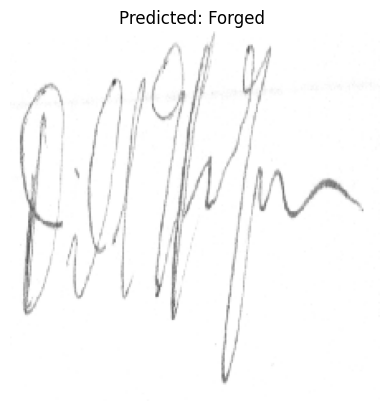

Prediction confidence (1=Genuine, 0=Forged): 0.0001


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# --- Load the Trained Model ---
# If you saved the model: model = tf.keras.models.load_model('model_path.h5')
# Otherwise, use the 'model' directly if trained in the same session

# --- Path to Test Image ---
test_image_path = "/content/signatures/signatures/full_forg/forgeries_10_11.png"  # Change this to your test image

# --- Load and Preprocess the Image ---
img = load_img(test_image_path, target_size=(224, 224))  # VGG16 expects 224x224 RGB
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# --- Predict ---
prediction = model.predict(img_array)

# --- Display Result ---
plt.imshow(img)
plt.title("Predicted: " + ("Forged " if prediction < 0.5 else "Genuine"))
plt.axis('off')
plt.show()

# Optional: print confidence
print(f"Prediction confidence (1=Genuine, 0=Forged): {prediction[0][0]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


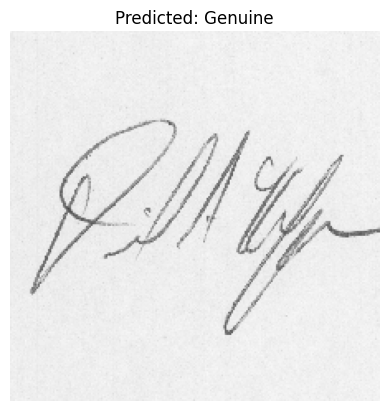

Prediction confidence (1=Genuine, 0=Forged): 0.9602


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# --- Load the Trained Model ---
# If you saved the model: model = tf.keras.models.load_model('model_path.h5')
# Otherwise, use the 'model' directly if trained in the same session

# --- Path to Test Image ---
test_image_path = "/content/signatures/signatures/full_org/original_10_13.png"  # Change this to your test image

# --- Load and Preprocess the Image ---
img = load_img(test_image_path, target_size=(224, 224))  # VGG16 expects 224x224 RGB
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# --- Predict ---
prediction = model.predict(img_array)

# --- Display Result ---
plt.imshow(img)
plt.title("Predicted: " + ("Forged " if prediction < 0.5 else "Genuine"))
plt.axis('off')
plt.show()

# Optional: print confidence
print(f"Prediction confidence (1=Genuine, 0=Forged): {prediction[0][0]:.4f}")
